# Feature selection

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import dataset(s) - the one transformed and one without transformations to compare the results
df = pd.read_csv('data3.csv')

## Kydavra PearsonCorrelationSelector

In [3]:
from kydavra import PearsonCorrelationSelector

In [4]:
# applying ElasticNetSelector on the df without transformations and visualze the selected columns
cols = PearsonCorrelationSelector(min_corr = 0.3, max_corr = 0.8).select(df, 'Life expectancy')
cols

['Status',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'BMI',
 'under-five deaths',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

This eliminates the fields 'Country', 'percentage expenditure', 'Measles', 'GDP', and 'Population' from the dataset. 

In [5]:
# append the target column to the list of selected columns
cols.append('Life expectancy')

In [6]:
# create a new ds of selected columns
df_selected = df[cols]

### Correlation in the resulted datset

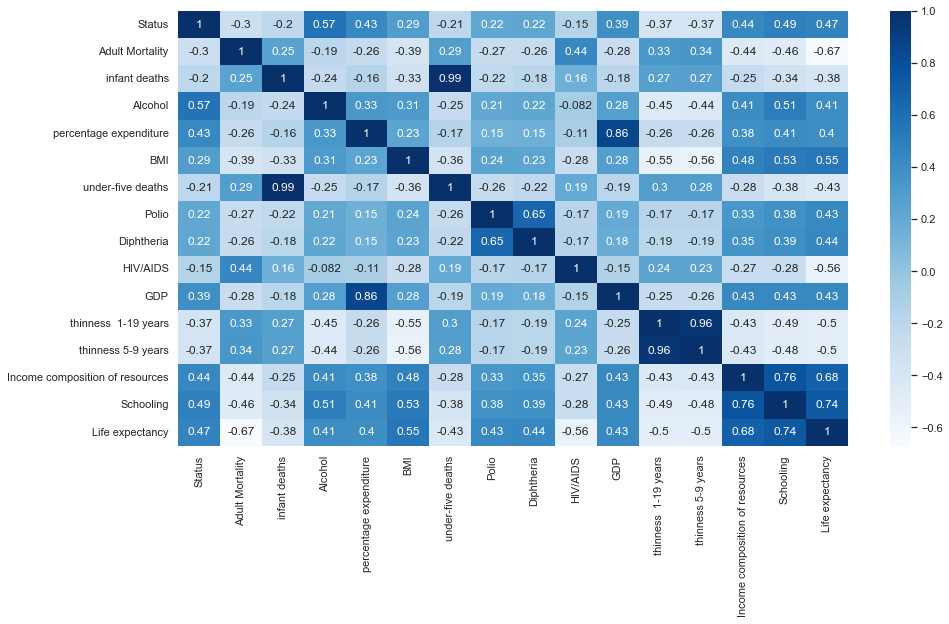

In [11]:
# looking at the correlation between features
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(df_selected.corr(), cmap='Blues', annot=True)
sns.set(rc = {'figure.figsize':(15,8)})
plt.show()

In [8]:
# saving df_selected on my PC as data4.csv
df_selected.to_csv('data4.csv', index = False)

### Dealing with multicolinearity

In [9]:
# erasing some columns from the dataset which were derived from others
erase_multicolinearity = df_selected.drop(['percentage expenditure', 'thinness 5-9 years', 'infant deaths'], axis = 1)

In [10]:
# saving the df
erase_multicolinearity.to_csv('data4_manual_removal.csv', index = False)